# Data Analysis Tools-Assignment 4([Coursera](https://www.coursera.org/learn/data-analysis-tools))

**This notebook has the relevant code for the Assignments of the Course - Data Analysis Tools**

## Topics Covered in this Notebook
**Test of Moderation**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.color_palette("colorblind")
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

import gc

from itertools import combinations

import scipy.stats
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
from statsmodels.stats.multitest import multipletests

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LassoLarsCV

In [2]:
#-------Read Data-------
df = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv',parse_dates=['datetime'])
df = df.rename({'count':'count_of_rentals'},axis=1)
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count_of_rentals,month,day_of_week,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,5,4


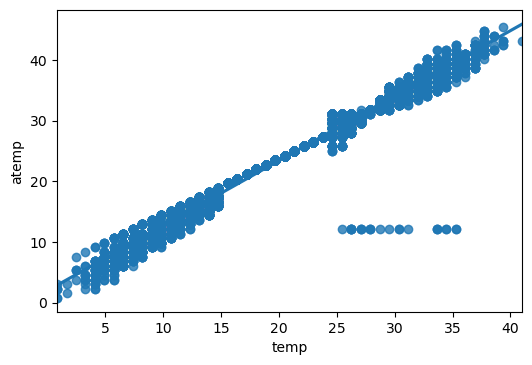

In [3]:
#--------Continious to Continious----------

sns.regplot(x="temp", y="atemp", fit_reg=True, data=df)
plt.show()

#Temp and Atemp are very significantly correlated

In [4]:
df['season'] = df['season'].map({  1:'spring', 2:'summer', 3:'fall', 4:'winter' })
df["season"].value_counts()

winter    2734
summer    2733
fall      2733
spring    2686
Name: season, dtype: int64

In [5]:
df['weather'] = df['weather'].map({ 
    1:'Clear, Few clouds, Partly cloudy, Partly cloudy',\
    2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',\
    3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',\
    4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}) 

**Let's consider the categorical explanatory variable 'Season' and the response variable The Count of rentals.**

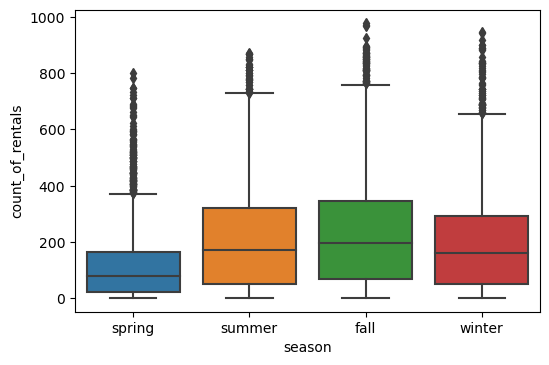

In [6]:
#-----Boxplot-----
#---Categorical to Quantitative---
sns.boxplot(x='season', y='count_of_rentals', data=df)
plt.show()

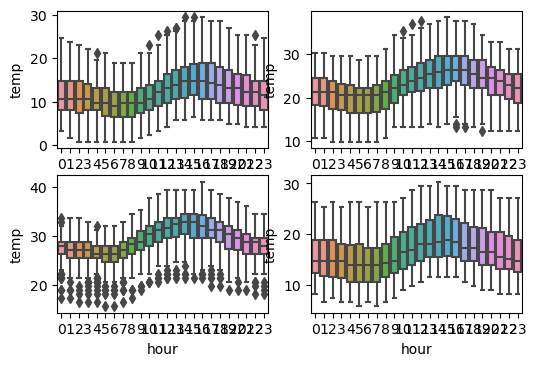

In [7]:
fig, axs = plt.subplots(nrows=2,ncols=2)

sns.boxplot(x='hour', y='temp', \
            data=df.loc[df["season"]=="spring",:],ax=axs[0][0])
sns.boxplot(x='hour', y='temp', \
            data=df.loc[df["season"]=="summer",:],ax=axs[0][1])
sns.boxplot(x='hour', y='temp', \
            data=df.loc[df["season"]=="fall",:],ax=axs[1][0])
sns.boxplot(x='hour', y='temp', \
            data=df.loc[df["season"]=="winter",:],ax=axs[1][1])
plt.show()

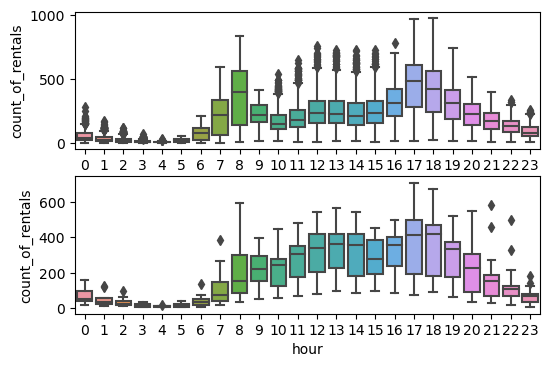

In [8]:
fig, axs = plt.subplots(nrows=2,ncols=1)

sns.boxplot(x='hour', y='count_of_rentals', \
            data=df.loc[df["holiday"]==0,:],ax=axs[0])
sns.boxplot(x='hour', y='count_of_rentals', \
            data=df.loc[df["holiday"]==1,:],ax=axs[1])

plt.show()

In [9]:
print('---Means of Rental Counts by Each Season---')
df.groupby('season')['count_of_rentals'].agg(['mean','std'])

---Means of Rental Counts by Each Season---


,mean,std
season,,
fall,234.417124,197.151001
spring,116.343261,125.273974
summer,215.251372,192.007843
winter,198.988296,177.622409


# Test of Moderation

In [41]:
df = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv',parse_dates=['datetime'])
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour
df = df.rename({'count':'count_of_rentals'},axis=1)
gc.collect()

115

In [45]:
holidays,non_holidays=df.loc[df["holiday"]==1,:],\
                      df.loc[df["holiday"]==0,:]

print("Holidays Statistics")
print(holidays.groupby("hour").agg({"count_of_rentals":["mean","median"]}))

print("Non Holidays Statistics")
print(non_holidays.groupby("hour").agg({"count_of_rentals":["mean","median"]}))

Holidays Statistics
     count_of_rentals       
                 mean median
hour                        
0           66.769231     51
1           43.230769     30
2           28.000000     18
3           12.416667      9
4            7.384615      7
5           13.230769     13
6           38.923077     32
7          111.000000     72
8          229.000000    153
9          211.307692    219
10         230.538462    244
11         274.846154    308
12         318.384615    341
13         326.384615    365
14         321.076923    357
15         292.769231    275
16         314.846154    358
17         368.000000    414
18         344.538462    418
19         280.230769    336
20         219.153846    225
21         181.846154    151
22         141.384615    107
23          72.461538     69
Non Holidays Statistics
     count_of_rentals       
                 mean median
hour                        
0           54.796380   41.0
1           33.582766   19.0
2           22.747126   11.0

<AxesSubplot:xlabel='hour'>

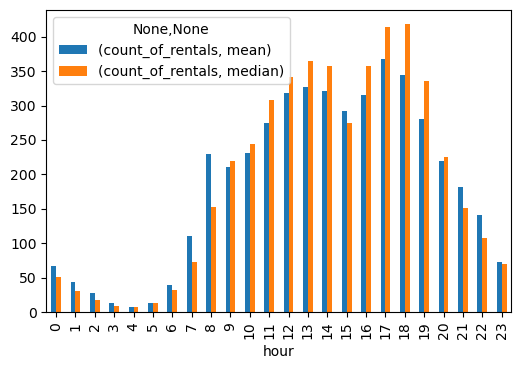

In [51]:
holidays.groupby("hour").agg({"count_of_rentals":["mean","median"]}).plot(kind="bar")

<AxesSubplot:xlabel='hour'>

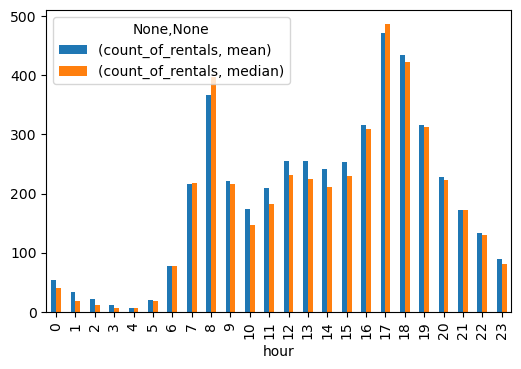

In [52]:
non_holidays.groupby("hour").agg({"count_of_rentals":["mean","median"]}).plot(kind="bar")

In [46]:
#------Fit an Ordinary Least Square------
print('----Fit an OLS Regression----')
model = smf.ols(formula='count_of_rentals ~ C(hour)', data=holidays).fit()
print (model.summary())

----Fit an OLS Regression----
                            OLS Regression Results                            
Dep. Variable:       count_of_rentals   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     13.85
Date:                Wed, 28 Apr 2021   Prob (F-statistic):           2.03e-34
Time:                        10:23:37   Log-Likelihood:                -1918.8
No. Observations:                 311   AIC:                             3886.
Df Residuals:                     287   BIC:                             3975.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       

In [47]:
#------Fit an Ordinary Least Square------
print('----Fit an OLS Regression----')
model = smf.ols(formula='count_of_rentals ~ C(hour)', data=non_holidays).fit()
print (model.summary())

----Fit an OLS Regression----
                            OLS Regression Results                            
Dep. Variable:       count_of_rentals   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     495.4
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        10:23:53   Log-Likelihood:                -66137.
No. Observations:               10575   AIC:                         1.323e+05
Df Residuals:                   10551   BIC:                         1.325e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       

# Inference-Test of Moderation
As we see Hour of the day plays a crucial role in determing the count of rentals. However when we compare holidays and non holidays, the time of **13:00 and 14:00 hours** we see more counts in case of holidays as compared to morning hours like **8**. Thus holiday works as a **moderator** between the relationship between Hour of Day and COunt of Rentals.